In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import gzip
import datetime, time

import pickle


# Read and Inspect Data

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

interaction = getDF('data/Amazon_Fashion.jsonl.gz')
meta = getDF('data/meta_Amazon_Fashion.jsonl.gz')

In [47]:
interaction.shape, meta.shape

((2500939, 10), (826108, 14))

In [4]:
interaction.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,1578528394489,3,True
1,5.0,A,Great,[],B07B4JXK8D,B07B4JXK8D,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1608426246701,0,True
2,2.0,Two Stars,One of the stones fell out within the first 2 ...,[],B007ZSEQ4Q,B007ZSEQ4Q,AHITBJSS7KYUBVZPX7M2WJCOIVKQ,1432344828000,3,True
3,1.0,Won’t buy again,Crappy socks. Money wasted. Bought to wear wit...,[],B07F2BTFS9,B07F2BTFS9,AFVNEEPDEIH5SPUN5BWC6NKL3WNQ,1546289847095,2,True
4,5.0,I LOVE these glasses,I LOVE these glasses! They fit perfectly over...,[],B00PKRFU4O,B00XESJTDE,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1439476166000,0,True


In [5]:
interaction.rating.value_counts()

rating
5.0    1426268
4.0     352327
1.0     303411
3.0     245471
2.0     173462
Name: count, dtype: int64

In [6]:
interaction.columns

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

In [7]:
interaction.isna().sum()

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64

In [122]:
interaction.verified_purchase.value_counts()

verified_purchase
True     2337702
False     163237
Name: count, dtype: int64

In [10]:
pd.to_datetime(interaction.timestamp.min(), unit='ms'), pd.to_datetime(interaction.timestamp.max(), unit='ms')

(Timestamp('2002-05-07 01:51:28'), Timestamp('2023-09-11 03:24:38.515000'))

In [ ]:
count_user = interaction.groupby('user_id').agg({'asin': 'nunique'}).reset_index().rename(columns={'asin': 'count_asin'})

count_user[count_user.count_asin>=5]

,user_id,count_asin
286,AE22M44KAE72RFU6DWM5Y3YN6SEA,9
611,AE23BYWB52METWQVHSPN3MKN7AJA,8
653,AE23ERACMJTGJJVEKZHU5VU6YZHA,11
963,AE23ZBUF2YVBQPH2NN6F5XSA3QYQ,7
1406,AE24VPMWEEQD62YPOG53BW7JCGFA,9
...,...,...
2034984,AHZZ2OXOLI63BPXIVEMTWFS77S7A,5
2035008,AHZZ476HPE5T27CPN62OV6RAM6KQ,5
2035048,AHZZ6SGWPYHMV7EKQDBVUTHHFZUA,11
2035153,AHZZFHROQ52EDDBX4FOQIEPSK5ZQ,5


In [130]:
count_user[count_user.count_asin>=5].shape

(14774, 2)

In [131]:
count_item = interaction.groupby('asin').agg({'user_id': 'nunique'}).reset_index().rename(columns={'user_id': 'count_user'})

count_item[count_item.count_user >= 5]

,asin,count_user
14,0545298156,6
15,0599521503,16
16,0610318861,47
18,0615991335,12
19,0629150591,103
...,...,...
873893,B0BX5PL8C5,13
873925,B0BXDCK1JD,5
873930,B0BXGZFLJ6,7
873944,B0BXNWBR6S,5


In [132]:
count_item[count_item.count_user >= 5].shape

(98999, 2)

In [14]:
meta.head(2)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,AMAZON FASHION,YUEDGE 5 Pairs Men's Moisture Control Cushione...,4.6,16,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],GiveGift,[],{'Package Dimensions': '10.31 x 8.5 x 1.73 inc...,B08BHN9PK5,None
1,AMAZON FASHION,DouBCQ Women's Palazzo Lounge Wide Leg Casual ...,4.1,7,"[Drawstring closure, Machine Wash]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],DouBCQ,[],{'Package Dimensions': '15 x 10.2 x 0.4 inches...,B08R39MRDW,None


In [15]:
meta.isna().sum()

main_category           0
title                   0
average_rating          0
rating_number           0
features                0
description             0
price              775859
images                  0
videos                  0
store               26838
categories              0
details                 0
parent_asin             0
bought_together    826108
dtype: int64

In [16]:
meta.shape

(826108, 14)

# Data Processing

## Filter interaction data
* Keep only verified purchases  
* Keep only records whose asin is the same as parent asin and is also in product metadata  
* Keep only userful columns: user id, item id, time stamp, rating
* Keep records whose user id has **reviewed at least 5 unique items** in the dataset (thus we can evaluate our model)   

Note: the order of step 2 and step 4 should not be reversed!!

In [197]:
interaction.head(1)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,1578528394489,3,True


In [ ]:
ratings = interaction[(interaction.asin.isin(meta.parent_asin)) & (interaction.verified_purchase == True)]

## note: interaction.asin.isin(meta.parent_asin) ensures the asin is the same as parent asin and is also in product metadata

ratings.shape

(2045374, 10)

In [199]:
count_user = ratings.groupby('user_id').agg({'asin': 'nunique'}).reset_index().rename(columns={'asin': 'count_asin'})

count_user[count_user.count_asin>=5].shape

(9566, 2)

In [200]:
ratings = ratings[(ratings.user_id.isin(count_user[count_user.count_asin>=5].user_id))]

ratings.shape

(63229, 10)

In [201]:
ratings.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
48,2.0,elastic adjustable bands for charge 4,"Well. I really like the idea, however, they a...",[],B098NYMTYH,B098NYMTYH,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1661808780730,0,True
49,2.0,open shoulder t shirt,"I am 5'7"".. usually wear a 14/16 or 0x/1x.. 38...",[],B095CHR38Z,B095CHR38Z,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1645062075013,2,True
50,5.0,fancy pumpkin headband,Purchased for my sister to use on Halloween......,[],B071HMN7K8,B071HMN7K8,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1635309000822,0,True
52,1.0,Nike Jacket?,The photo doesn't show this but you need a col...,[],B074XF4KG4,B074XF4KG4,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1611092662402,0,True
53,4.0,green turtleneck,"Slimfit green turtleneck... I am 5'7""... 38DDD...",[],B08KXH42H9,B08KXH42H9,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1607128372655,0,True


In [209]:
## last interaction of each user

loo = ratings.loc[ratings.groupby('user_id')['timestamp'].idxmax()]

In [210]:
## remained interactions excluding last interaction of each user

remain = ratings[~ratings.index.isin(loo.index)]
remain.shape, loo.shape, ratings.shape

((53663, 10), (9566, 10), (63229, 10))

In [212]:
loo[['user_id', 'asin', 'rating', 'timestamp']].head()

,user_id,asin,rating,timestamp
1465723,AE22M44KAE72RFU6DWM5Y3YN6SEA,B01LXOXLA1,3.0,1494008552000
1008584,AE23BYWB52METWQVHSPN3MKN7AJA,B094J98QT9,1.0,1653146545518
794474,AE23ERACMJTGJJVEKZHU5VU6YZHA,B0713PN77B,5.0,1560016417138
1481228,AE26PXEWX73ULGW5RAROBYPTWCWA,B0779ZCLG1,5.0,1533549549679
1690323,AE26QJAXLZIQC4UNFKQFA4M2A3VA,B07WCLP2GK,5.0,1569034094097


In [213]:
loo[loo.asin.isin(remain.asin)][['user_id', 'asin', 'rating', 'timestamp']]

## 1426 users whose last interacted item is in the remained interactions. These records can be used as test set so that the test items all appear in the training set.

,user_id,asin,rating,timestamp
794474,AE23ERACMJTGJJVEKZHU5VU6YZHA,B0713PN77B,5.0,1560016417138
785680,AE274ELTNGUU6B3ZF7HUUJARXUIQ,B00N9X8VHY,5.0,1475322186000
1242387,AE2E2EBMC32XMPHHYTQBXU4MXCNA,B01EN4KVRK,5.0,1498787164039
945782,AE2MR33PBSOMX3ISKWRFFWP2V66Q,B00KA3SRVG,5.0,1460551598000
726398,AE2NF4KWRNOCX3AELFDWT3XSWSQQ,B07PR6F5JD,5.0,1560815099430
...,...,...,...,...
1540721,AHZP4XCD3RAB4KJG3J5N4QYESCKA,B00PJIPH2O,2.0,1483042586000
909784,AHZP5Q474KKOF465OFANSHL6FRXA,B01K8YIB8K,5.0,1536254130657
570908,AHZUZ3YYBUE7D7DG5QJ46EDASOOQ,B00KATGS16,5.0,1481438428000
610838,AHZXRKXTXBLR5JJKFQZ3ME2VWCMA,B00KA3VX62,5.0,1529615304471


In [214]:
test_set = loo[loo.asin.isin(remain.asin)]
test_userid = loo[loo.asin.isin(remain.asin)].user_id
test_set.shape

(1426, 10)

In [217]:
train_set = ratings[~ratings.index.isin(test_set.index)]
train_set.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
48,2.0,elastic adjustable bands for charge 4,"Well. I really like the idea, however, they a...",[],B098NYMTYH,B098NYMTYH,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1661808780730,0,True
49,2.0,open shoulder t shirt,"I am 5'7"".. usually wear a 14/16 or 0x/1x.. 38...",[],B095CHR38Z,B095CHR38Z,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1645062075013,2,True
50,5.0,fancy pumpkin headband,Purchased for my sister to use on Halloween......,[],B071HMN7K8,B071HMN7K8,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1635309000822,0,True
52,1.0,Nike Jacket?,The photo doesn't show this but you need a col...,[],B074XF4KG4,B074XF4KG4,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1611092662402,0,True
53,4.0,green turtleneck,"Slimfit green turtleneck... I am 5'7""... 38DDD...",[],B08KXH42H9,B08KXH42H9,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1607128372655,0,True


### check if training set and test set are eligible for model training and testing
* all users in train_set must have interacted at least 4 items in train_set (and have interacted at least 5 items in the whole dataset)  
* all items in test_set must have been interacted (have appeared) in train_set

In [218]:
train_set.groupby('user_id').agg({'asin': 'nunique'}).reset_index().rename(columns={'asin': 'count_asin'}).describe()

,count_asin
count,9566.000000
mean,6.424420
std,3.006229
min,4.000000
25%,5.000000
50%,5.000000
75%,7.000000
max,57.000000


In [222]:
test_set[~test_set.asin.isin(train_set.asin)].shape

(0, 10)

### filter and rename columns and save to files

In [225]:
ratings = ratings[['user_id', 'asin', 'rating', 'timestamp']].rename(columns={'asin': 'item_id'})
train_set = train_set[['user_id', 'asin', 'rating', 'timestamp']].rename(columns={'asin': 'item_id'})
test_set = test_set[['user_id', 'asin', 'rating', 'timestamp']].rename(columns={'asin': 'item_id'})

In [230]:
ratings.to_csv('data/ratings.csv')
train_set.to_csv('data/train_set.csv')
test_set.to_csv('data/test_set.csv')

## Filter product metadata

In [96]:
meta.head(2)

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,AMAZON FASHION,YUEDGE 5 Pairs Men's Moisture Control Cushione...,4.6,16,[],[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],GiveGift,[],{'Package Dimensions': '10.31 x 8.5 x 1.73 inc...,B08BHN9PK5,None
1,AMAZON FASHION,DouBCQ Women's Palazzo Lounge Wide Leg Casual ...,4.1,7,"[Drawstring closure, Machine Wash]",[],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],DouBCQ,[],{'Package Dimensions': '15 x 10.2 x 0.4 inches...,B08R39MRDW,None


In [97]:
meta.description.apply(lambda x: len(x)).describe()  ## description column not useful since too many are empty

count    826108.000000
mean          0.181550
std           1.374751
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         101.000000
Name: description, dtype: float64

In [231]:
product = meta[['parent_asin', 'title']].rename(columns={'parent_asin': 'item_id'})

In [235]:
product = product[product.item_id.isin(ratings.item_id)]

product.shape

(52619, 2)

In [236]:
product.head()

,item_id,title
9,B07DXHY5ZX,PattyBoutik Women Crewneck Eyelet Cold Shoulde...
21,B01AUYK33Y,Stainless Steel Bracelet Grooved Cuff Bangle f...
22,B074C8GVHJ,ACEVOG Women Floral Printed Button Down V Neck...
26,B077JWX1MX,ELEOSL Women Ladies Sleeveless Fit and Flare R...
39,B08TWC3WKW,akimoom Scrunchie Watch Band for Galaxy 46mm/G...


In [237]:
product.to_csv('data/product.csv')

# EDA

In [315]:
ratings = pd.read_csv('data/ratings.csv')
train_set = pd.read_csv('data/train_set.csv')
test_set = pd.read_csv('data/test_set.csv')

ratings.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
train_set.rename(columns={'Unnamed: 0': 'id'}, inplace=True)
test_set.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [316]:
ratings.shape, ratings.user_id.nunique(), ratings.item_id.nunique()

((63229, 5), 9566, 52619)

In [317]:
print('sparsity of ratings matrix:', ratings.shape[0]/(ratings.user_id.nunique()*ratings.item_id.nunique()))

sparsity of ratings matrix: 0.00012561553329790666


In [319]:
ratings.head()

,id,user_id,item_id,rating,timestamp
0,48,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B098NYMTYH,2.0,1661808780730
1,49,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B095CHR38Z,2.0,1645062075013
2,50,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B071HMN7K8,5.0,1635309000822
3,52,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B074XF4KG4,1.0,1611092662402
4,53,AFZUK3MTBIBEDQOPAK3OATUOUKLA,B08KXH42H9,4.0,1607128372655


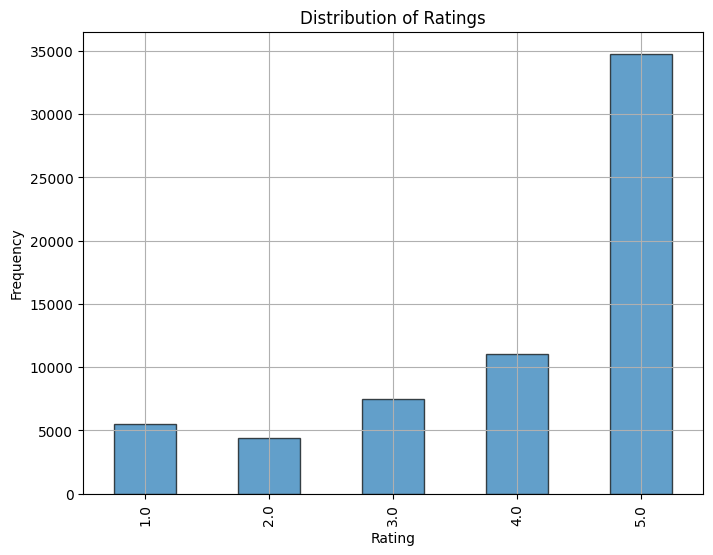

In [321]:
plt.figure(figsize=(8, 6))

ratings['rating'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6), edgecolor='k', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Model and Benchmark
Google Colab: https://colab.research.google.com/drive/1CsePfKM1cga11LTNyFHwijytIAEtzwBi#scrollTo=hCBXS6Fa7jHg